In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.

## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

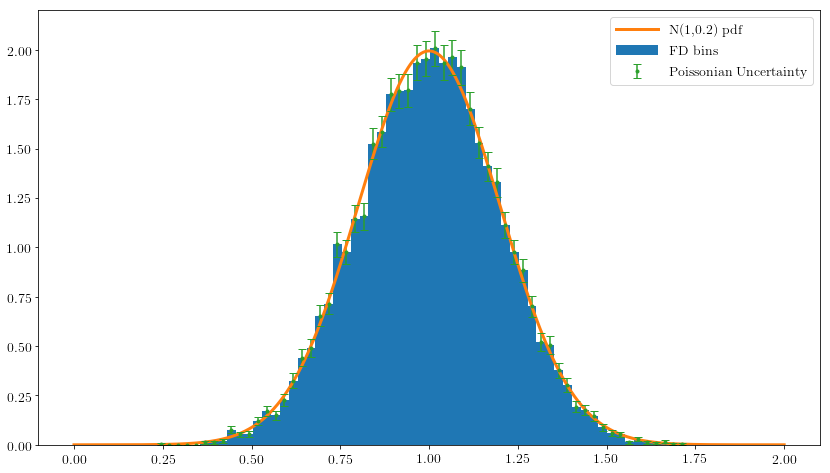

In [38]:
#set fig size
fig = plt.figure(figsize=(14,8))

# instantiate dist and draw
dist = norm(1, 0.2)
draws = dist.rvs(10000)

# plot hist bined using Freedman-Diaconis rule
y, bins, patches = fancyhist(draws, bins='freedman', density=True, label='FD bins')

# calculate uncertainty, find bin centers
yerr = np.sqrt(y*(bins[1]-bins[0])*10000)/(10000*(bins[1]-bins[0]))
centers = (bins[:-1]+bins[1:])/2

# overplot true dist pdf and errorbar
x = np.linspace(0,2, 1000)
plt.plot(x, dist.pdf(x), linewidth=3, label='N(1,0.2) pdf')
plt.errorbar(centers, y, yerr, fmt='.', capsize=4, label='Poissonian Uncertainty')
plt.legend()

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


In [42]:
# create cauchy dist and draw
cauchy_dist = cauchy(2, 0.5)
c_draws = cauchy_dist.rvs(10000)

# concate two arrays
all_draws = np.concatenate((draws, c_draws))

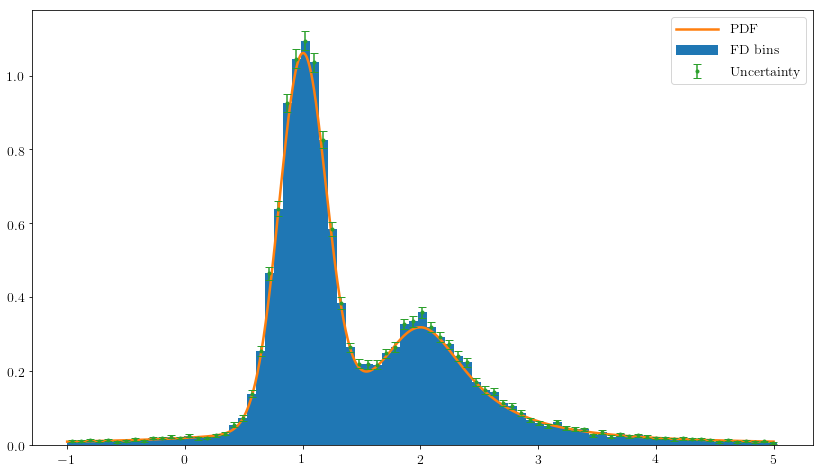

In [46]:
# plot using FD bins
fig = plt.figure(figsize=(14,8))
y, bins, patches = fancyhist(all_draws, bins='freedman', density=True, range=(-1,5), label='FD bins')
yerr = np.sqrt(y*(bins[1]-bins[0])*20000)/(20000*(bins[1]-bins[0]))
centers = (bins[:-1]+bins[1:])/2
x = np.linspace(-1, 5, 1000)
plt.plot(x, (dist.pdf(x)+cauchy_dist.pdf(x))/2, linewidth=2.5, label='PDF')
plt.errorbar(centers, y, yerr, fmt='.', capsize=4, label='Uncertainty')
plt.legend()

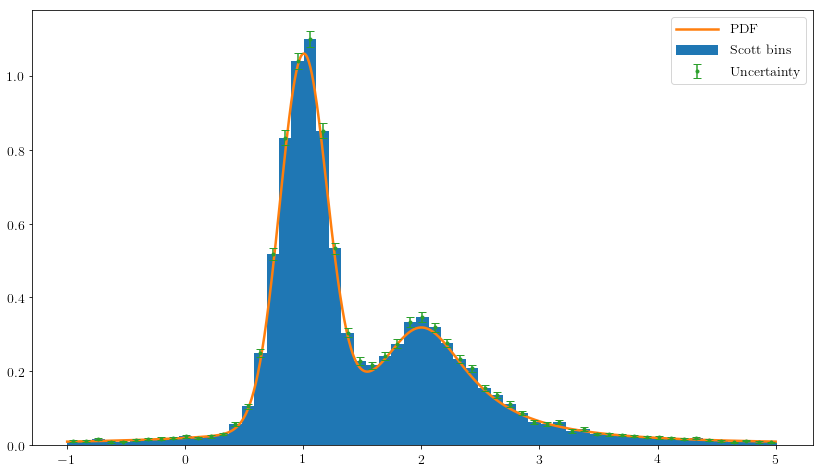

In [48]:
# plot using scott bins
fig = plt.figure(figsize=(14,8))
y, bins, patches = fancyhist(all_draws, bins='scott', density=True, range=(-1,5), label='Scott bins')
yerr = np.sqrt(y*(bins[1]-bins[0])*20000)/(20000*(bins[1]-bins[0]))
centers = (bins[:-1]+bins[1:])/2
x = np.linspace(-1, 5, 1000)
plt.plot(x, (dist.pdf(x)+cauchy_dist.pdf(x))/2, linewidth=2.5, label='PDF')
plt.errorbar(centers, y, yerr, fmt='.', capsize=4, label='Uncertainty')
plt.legend()

## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

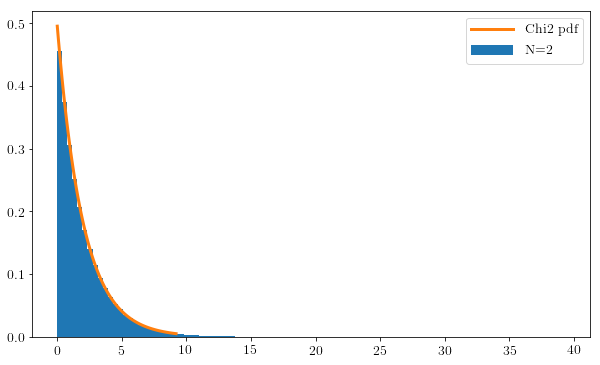

In [29]:
fig = plt.figure(figsize=(10,6))

# declare norm dist
N=2
dist = norm(0,1)
chi = np.zeros(1000000)

# Draw N samples from norm for 1M times
for i in range(1000000):
    sample = np.square(dist.rvs(2))
    d_pt = sample.sum()
    chi[i] = d_pt
_ = plt.hist(chi, bins= 100, density=True, label='N=2')

# overploting pdf
from scipy.stats import chi2
x = np.linspace(chi2.ppf(0.01, N), chi2.ppf(0.99, N), 100)
plt.plot(x, chi2.pdf(x, N), linewidth=3, label='Chi2 pdf')
plt.legend()

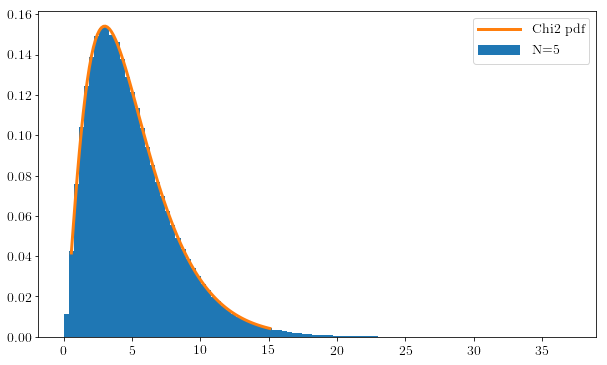

In [31]:
fig = plt.figure(figsize=(10,6))

# declare norm dist
N=5
dist = norm(0,1)
chi = np.zeros(1000000)

# Draw N samples from norm for 1M times
for i in range(1000000):
    sample = np.square(dist.rvs(5))
    d_pt = sample.sum()
    chi[i] = d_pt
_ = plt.hist(chi, bins= 100, density=True, label='N=5')

# overploting pdf
from scipy.stats import chi2
x = np.linspace(chi2.ppf(0.01, N), chi2.ppf(0.99, N), 100)
plt.plot(x, chi2.pdf(x, N), linewidth=3, label='Chi2 pdf')
plt.legend()

### Some useful definitions and functions

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.